In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
Redwine= pd.read_csv("winequality-red.csv", delimiter=';')

Text(0.5, 1.0, 'Red Wine Quality')

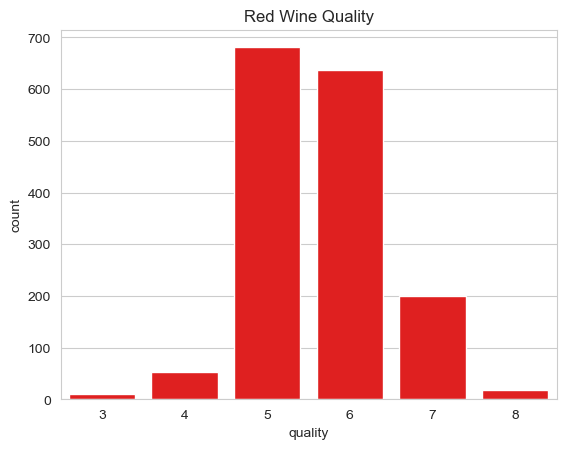

In [50]:
sns.countplot(data=Redwine,x='quality', color='r')
plt.title('Red Wine Quality')

In [51]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
Redwine['quality_label'] = Redwine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into a categorical data type (specific to pandas) instead of a simple string
Redwine['quality_label'] = pd.Categorical(Redwine['quality_label'],
categories=['low', 'medium', 'high'])
Redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


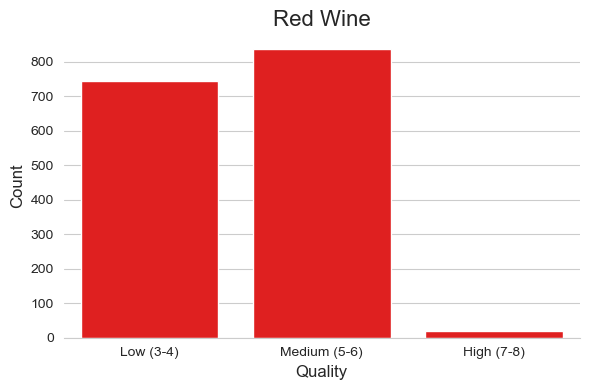

In [52]:

# Set the style for the plots
sns.set_style("whitegrid")

# Create the figure and axis (only one subplot for white wine)
fig, ax = plt.subplots(figsize=(6, 4))

# Plot for White Wine
sns.countplot(data=Redwine, x='quality_label', ax=ax, color='r')
ax.set_title("Red Wine", fontsize=16)

# Set x-axis labels to reflect the quality levels
ax.set_xticklabels(['Low (3-4)', 'Medium (5-6)', 'High (7-8)'])

# Remove top and right spines for a cleaner look
sns.despine(ax=ax, top=True, right=True, left=True)

# Add x and y labels for clarity
ax.set_xlabel("Quality", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Redwine['quality_label'] = le.fit_transform(Redwine['quality_label'])
Redwine['quality_label'].head()

0    1
1    1
2    1
3    2
4    1
Name: quality_label, dtype: int32

In [54]:
X = Redwine.drop(columns=['quality_label','quality'])
y = Redwine['quality_label']

In [55]:
y

0       1
1       1
2       1
3       2
4       1
       ..
1594    1
1595    2
1596    2
1597    1
1598    2
Name: quality_label, Length: 1599, dtype: int32

In [56]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [57]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=1000)

In [59]:
LR_model.fit(X_train_norm, y_train)

LogisticRegression(max_iter=1000)

In [60]:
preds = LR_model.predict(X_test_norm)
preds

array([1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1,

In [61]:
y_test

803     2
124     1
350     2
682     1
1326    2
       ..
1259    2
1295    1
1155    1
963     2
704     1
Name: quality_label, Length: 320, dtype: int32

In [62]:
from sklearn.metrics import accuracy_score 

acc = accuracy_score(y_test, preds)
acc

0.721875

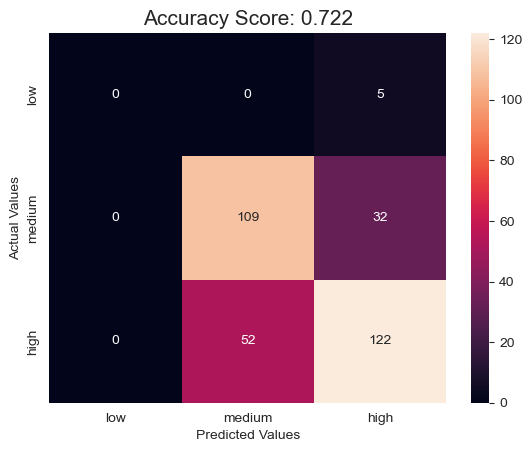

In [65]:
from sklearn.metrics import confusion_matrix as cm

predictions = LR_model.predict(X_test_norm)
score = round(accuracy_score(y_test, preds), 3)
cm1 = cm(y_test, preds)
cm2 = pd. DataFrame(cm1, index = [ 'low', 'medium', 'high'], columns = [ 'low', 'medium', 'high'])
sns.heatmap(cm2, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [64]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, preds))

[[  0   0   5]
 [  0 109  32]
 [  0  52 122]]
